# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

### Following cell is for importing libraries, reading the dataset and getting the info of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


In [2]:
df.head() # to get the first five rows of the dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [3]:
print("The number of missing values in each column is given below")
df.isna().sum()

The number of missing values in each column is given below


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

**The above cell is to find the number of missing values in each column. The column with highest number of missing values is "transmission", I can say that this column is not needed for exploratory data analysis. I can also say that car pricing mainly depends on make, model,color, its condition, mmr. Data analysis between mmr (estimated price of the car) and selling price (actual price of the car) will be very useful for finding the price of car.**


## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [4]:
df.dtypes # finding the data types of each column

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

**mmr column contains more numeric values but it is coded as object type, so I converted this column into numeric**

In [5]:
df['mmr'] = pd.to_numeric(df['mmr'], errors = 'coerce')

In [6]:
df.dtypes # print the data types after converting the data type of the column

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice      int64
saledate         object
dtype: object

**condition column determines the condition of the car in numerical values, but it is coded as object, so I converted this column also into numeric**

In [7]:
df['condition'] = pd.to_numeric(df['condition'], errors = 'coerce')

In [8]:
df.dtypes # print the data types after converting the data type of the column

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice      int64
saledate         object
dtype: object

Sample narrative description.

**In this question, data types of the column are found and then the columns which are coded as incorrect type are corrected. "mmr" and "condition" columns are converted into numeric because their values are numeric. errors = 'coerce' is used when the column contains one or two string values, they cannot be converted, so NaN values are replaced in the place of that values.**

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [9]:
df['make'] # print the make column values

0            Kia
1            Kia
2            BMW
3          Volvo
4            BMW
           ...  
558832       Kia
558833       Ram
558834       BMW
558835    Nissan
558836      Ford
Name: make, Length: 558837, dtype: object

In [10]:
df['make'].isna().sum() # find out the count of missing values in make column

10301

In [11]:
df['make'].nunique() # find the number of unique values in make column

96

In [12]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes) 

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 's

**The above code is used to the unique values of make column into list and then converting them all to lowercase to avoid same values but different case, then they are sorted. From the output, I have observed that they are duplicate values in the column.**

### Code to reduce the number of unique values

In [13]:
df['make'] = df['make'].str.upper() # first convert all the column values either to lower or uppercase

In [14]:
df.drop_duplicates(subset = ['make']) # drop duplicates function is used to reduce the number of unique values

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,KIA,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,VOLVO,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,NISSAN,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
7,2014,CHEVROLET,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49275,1998,DOT,durango,NaN,NaN,automatic,1b4hs28yxwf151692,az,1.9,191734.0,silver,gray,southwest title loans,850.0,500,Tue Dec 23 2014 11:00:00 GMT-0800 (PST)
71286,2008,ASTON MARTIN,V8 Vantage,N400 Roadster,Convertible,automatic,scfbf04b18gd07963,nv,4.2,23479.0,gray,black,las vegas motorcars llc,54600.0,51000,Fri Jan 09 2015 12:00:00 GMT-0800 (PST)
123924,2012,FISKER,Karma,Eco-Sport,Sedan,automatic,yh4k14aaxca001360,ca,4.2,1806.0,black,yellow,desert european motorcars,53700.0,54500,Thu Jan 15 2015 04:00:00 GMT-0800 (PST)
288377,2007,LAMBORGHINI,Gallardo,Spyder,Convertible,automatic,zhwgu22t47la04447,fl,4.2,8824.0,yellow,black,tdaf remarketing,120000.0,117500,Tue Feb 10 2015 01:00:00 GMT-0800 (PST)


In [15]:
df['make'].nunique() # get the count of reduced unique values

66

In [16]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nan',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw']

**The above code is used to the unique values of make column into list and then converting them all to lowercase to avoid same values but different case, then they are sorted. From the output, I have observed that they are no duplicate values in the column.**

Sample narrative description.

**First, find the count of unique values in the column make, there are 96 values. Then print the unique values using the hint given in the question. I have found that there are duplicate values in the column. So, to remove the duplicates from the column, I have used drop_duplicates method which contains the subset attribute (determines for which column duplicates are to be removed). Then, find the count of unqiue values again which got reduced to 66**

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

**Overall correlation**

In [17]:
c = df['mmr'].corr(df['sellingprice'])
print("The overall correlation between mmr and selling price is ", c*100)

The overall correlation between mmr and selling price is  98.36337168977236


**The below code is used to first assign the values of the selling price windows and then finding the correlation between mmr and selling price of the particular window.**

In [18]:
# Assigning the selling price window to the variables
first_window = df[(df['sellingprice'] >= 0) & (df['sellingprice'] <= 10000)]
second_window = df[(df['sellingprice'] >= 0) & (df['sellingprice'] <= 20000)]
third_window = df[(df['sellingprice'] >= 0) & (df['sellingprice'] <= 30000)]
fourth_window = df[(df['sellingprice'] >= 0) & (df['sellingprice'] <= 40000)]

# Calculating the correlation between mmr and selling price based on the above assigned windows
corr_first_window = first_window['mmr'].corr(first_window['sellingprice'])
corr_second_window = second_window['mmr'].corr(second_window['sellingprice'])
corr_third_window = third_window['mmr'].corr(third_window['sellingprice'])
corr_fourth_window = fourth_window['mmr'].corr(fourth_window['sellingprice'])

# Printing the correlation of all the calculated windows
print("Correlation for first window 0-10000:", corr_first_window)
print("Correlation for second window 0-20000:", corr_second_window)
print("Correlation for third window 0-30000:", corr_third_window)
print("Correlation for fourth window 0-40000:", corr_fourth_window)

Correlation for first window 0-10000: 0.874354272124959
Correlation for second window 0-20000: 0.9584428323123206
Correlation for third window 0-30000: 0.9744203460442996
Correlation for fourth window 0-40000: 0.9791682459086513


**Below code is plot the scatterplot between mmr and selling price**

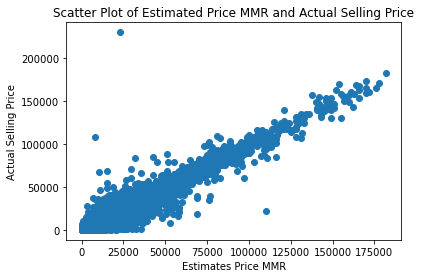

In [19]:
plt.scatter(df['mmr'], df['sellingprice'])
plt.xlabel('Estimates Price MMR')
plt.ylabel('Actual Selling Price')
plt.title('Scatter Plot of Estimated Price MMR and Actual Selling Price')
plt.show()


**Below is the code to plot the graph to show how the relationship changes**

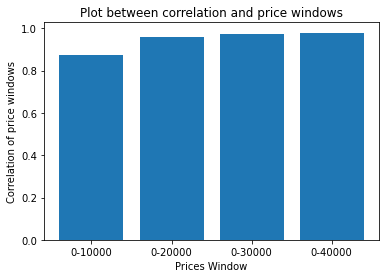

In [20]:
window_prices = ['0-10000', '0-20000', '0-30000', '0-40000']  
corr_windows = [corr_first_window, corr_second_window, corr_third_window, corr_fourth_window]  

plt.bar(window_prices, corr_windows)
plt.xlabel('Prices Window')
plt.ylabel('Correlation of price windows')
plt.title('Plot between correlation and price windows')
plt.show()


Sample narrative description.

**Overall correlation** - found by using corr() function. I have found that these two variables are strongly correlated with 98 percent.

**Correlation Changes** - Assigned the window length to variables and found correlation between mmr and selling price based on that windows. It is found that correlation between mmr and selling price is positively correlated. MMR is increasing with the increase in selling price and vice versa.

**Scatter Plot** - Scatter plot is plotted between mmr and selling price using plt.scatter function. The x-label, y-label and title is also given. It can also be found in this plot that increase in selling price also increases mmr.

**Plot to find the relationship changes** - Assign the window prices and correlation of that windows to respective variables. Plot the bar between these two variables using plt.bar function. The x-label, y-label and title is also given. It can also be truly observed from the plot that increase in selling price also increases mmr.



## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [21]:
# Assign the rows of years between 2010 to 2015 to a variable

years = df[(df['year']>=2010) & (df['year']<=2015)]

In [22]:
# use the above variables years to find the top 10 values of make column and convert them all to the list
top_car_making = years['make'].value_counts().head(10).index.tolist()
top_car_making

['FORD',
 'NISSAN',
 'CHEVROLET',
 'TOYOTA',
 'DODGE',
 'HYUNDAI',
 'HONDA',
 'KIA',
 'INFINITI',
 'BMW']

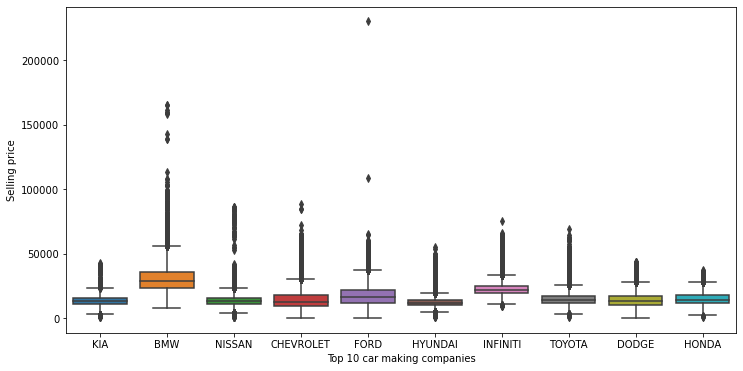

In [23]:
# plot between top makes of the car and selling price using the above years data
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='make',y='sellingprice', data = years[years['make'].isin(top_car_making)])
plt.xlabel("Top 10 car making companies")
plt.ylabel("Selling price")
plt.show()

Sample narrative description.

**First, assign the rows of data which has the years between 2010 and 2015. Then, use this data to get the top 10 car making companies using value_counts, head and add them to the list using tolist() function. Then, plot using boxplot (this is used for plotting between a categorical and contionous variable) between "make" column (filter the column and take the only data which are in the list of top 10 car making companies) and selling price. From the plot, it is ckear that Ford and BMW has the highest selling price compared to the others.**